# Latar Belakang 

Kumpulan data Pemantauan Diagnosis dan Perawatan Kesehatan Mental berisi 500 baris yang mewakili diagnosis kesehatan mental, rencana perawatan, dan hasil di dunia nyata. Kumpulan data ini mencakup demografi pasien, tingkat keparahan gejala, pengobatan, jenis terapi, dan pelacakan kemajuan. Kumpulan data ini bersifat sintetis dan dibuat untuk tujuan penelitian dan analisis. **Tujuan untuk projek kali ini adalah membuat prediksi Symtom Severity yang memiliki skala penilaian 1-10. Symtom Severyty adalah tingkat keparahan suatu gejala yang dialami oleh seseorang.** Ini biasanya diukur berdasarkan intensitas, frekuensi, dan dampaknya terhadap aktivitas sehari-hari.

Beberapa variabel yang umumnya terdapat dalam dataset ini dan dapat dianalisis antara lain:
1. ID Pasien: Pengidentifikasi unik.
2. Usia: Usia pasien.
3. Jenis Kelamin: Pria atau Wanita.
4. Diagnosis: Kondisi kesehatan mental (misalnya, Kecemasan, Depresi).
5. Tingkat Keparahan Gejala (1-10): Tingkat keparahan gejala.
6. Skor Suasana Hati (1-10): Penilaian suasana hati selama perawatan.
7. Kualitas Tidur (1-10): Kualitas tidur yang dilaporkan pasien.
8. Aktivitas Fisik: Jam aktivitas per minggu.
9. Obat: Obat yang diresepkan (misalnya, SSRI, Antidepresan).
10. Jenis Terapi: Jenis terapi (misalnya, CBT, DBT).
11. Tanggal Mulai Perawatan: Tanggal perawatan dimulai.
12. Durasi Perawatan: Durasi perawatan dalam minggu.
13. Tingkat Stres (1-10): Tingkat stres pasien.
14. Hasil: Hasil perawatan (misalnya, Membaik, Memburuk).
15. Progres Perawatan (1-10): Kemajuan yang dicapai selama perawatan. Keadaan Emosional yang Terdeteksi AI: Keadaan emosi yang terdeteksi AI (misalnya, Bahagia, Cemas).
16. Kepatuhan terhadap Perawatan (%): Persentase kepatuhan terhadap rencana perawatan.


# Import Library

In [4]:
# import library preprocessing dan visualisasi
import numpy as np # untuk perhitungan statistik
from numpy import mean # mencari nilai mean
import pandas as pd #membaca, pembersihan, analisis data 
import matplotlib.pyplot as plt # visualisasi data
%matplotlib inline
import seaborn as sns # membuat grafik dan statistik
from sklearn.preprocessing import LabelEncoder, StandardScaler #pemrosesan data
from sklearn import preprocessing # pemrosesan data
from sklearn.model_selection import train_test_split # membagi data menjadi dua, yaitu data testing dan training 
from sklearn.metrics import r2_score, mean_squared_error #matriks evalusi

import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil')

Import Library Berhasil


# Loding Data Set

In [6]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


# Melihat Ukuran Data (Baris, Kolom)

In [8]:
#checing total row,columns
df.shape

(500, 17)

# Pengecekan Nama Kolom

In [10]:
#checking values/name of columns
df.columns.values #checking values/name of columns

array(['Patient ID', 'Age', 'Gender', 'Diagnosis',
       'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Medication', 'Therapy Type', 'Treatment Start Date',
       'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Outcome',
       'Treatment Progress (1-10)', 'AI-Detected Emotional State',
       'Adherence to Treatment (%)'], dtype=object)

# Deskriptif Statistik

In [12]:
#showing statistic of dataset
df.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


# Tipe Data

In [14]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

# Pengecekan Missing Value

In [16]:
df.isna().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

Setelah pengecekan missing value, ternyata data tidak terdapat null (kekosonagn data)

# Pengeceken Duplikat

In [19]:
df.duplicated().sum()

0

Setelah dicek duplikat data, tidak terdapat data yang terduplikat

# Pre Processing Data

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # merubah angka 

In [23]:
df_baru = df.copy()

In [24]:
df_baru["Gender"]=encoder.fit_transform(df_baru["Gender"]) 
df_baru["Diagnosis"]=encoder.fit_transform(df_baru["Diagnosis"]) 
df_baru["Medication"]=encoder.fit_transform(df_baru["Medication"]) 
df_baru["Therapy Type"]=encoder.fit_transform(df_baru["Therapy Type"]) 
df_baru["Outcome"]=encoder.fit_transform(df_baru["Outcome"]) 
df_baru["AI-Detected Emotional State"]=encoder.fit_transform(df_baru["AI-Detected Emotional State"]) 

In [25]:
df_baru

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,0,2,10,5,8,5,4,2,2024-01-25,11,9,0,7,0,66
1,2,40,0,2,9,5,4,7,1,2,2024-02-27,11,7,2,7,4,78
2,3,55,0,2,6,3,4,3,5,3,2024-03-20,14,7,0,5,3,62
3,4,34,0,2,6,3,6,5,5,3,2024-03-29,8,8,0,10,2,72
4,5,52,1,3,7,6,6,8,2,2,2024-03-18,12,5,0,6,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,1,1,10,4,8,6,4,1,2024-04-09,8,9,1,10,1,73
496,497,22,1,3,5,6,6,7,3,3,2024-02-05,13,6,0,8,3,86
497,498,23,1,2,7,3,4,2,0,0,2024-03-24,10,5,0,5,4,87
498,499,48,1,0,9,4,6,9,0,3,2024-03-22,10,6,1,7,0,73


# Eksplorasi Data Analyst

## Penghapusan Kolom yang Tidak Digunakan

In [28]:
df_baru2 = df_baru.drop(columns=["Patient ID","Treatment Start Date"])

In [29]:
df_baru2

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43,0,2,10,5,8,5,4,2,11,9,0,7,0,66
1,40,0,2,9,5,4,7,1,2,11,7,2,7,4,78
2,55,0,2,6,3,4,3,5,3,14,7,0,5,3,62
3,34,0,2,6,3,6,5,5,3,8,8,0,10,2,72
4,52,1,3,7,6,6,8,2,2,12,5,0,6,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,1,1,10,4,8,6,4,1,8,9,1,10,1,73
496,22,1,3,5,6,6,7,3,3,13,6,0,8,3,86
497,23,1,2,7,3,4,2,0,0,10,5,0,5,4,87
498,48,1,0,9,4,6,9,0,3,10,6,1,7,0,73


## Seleksi Fitur (Korelasi Antar Variabel)

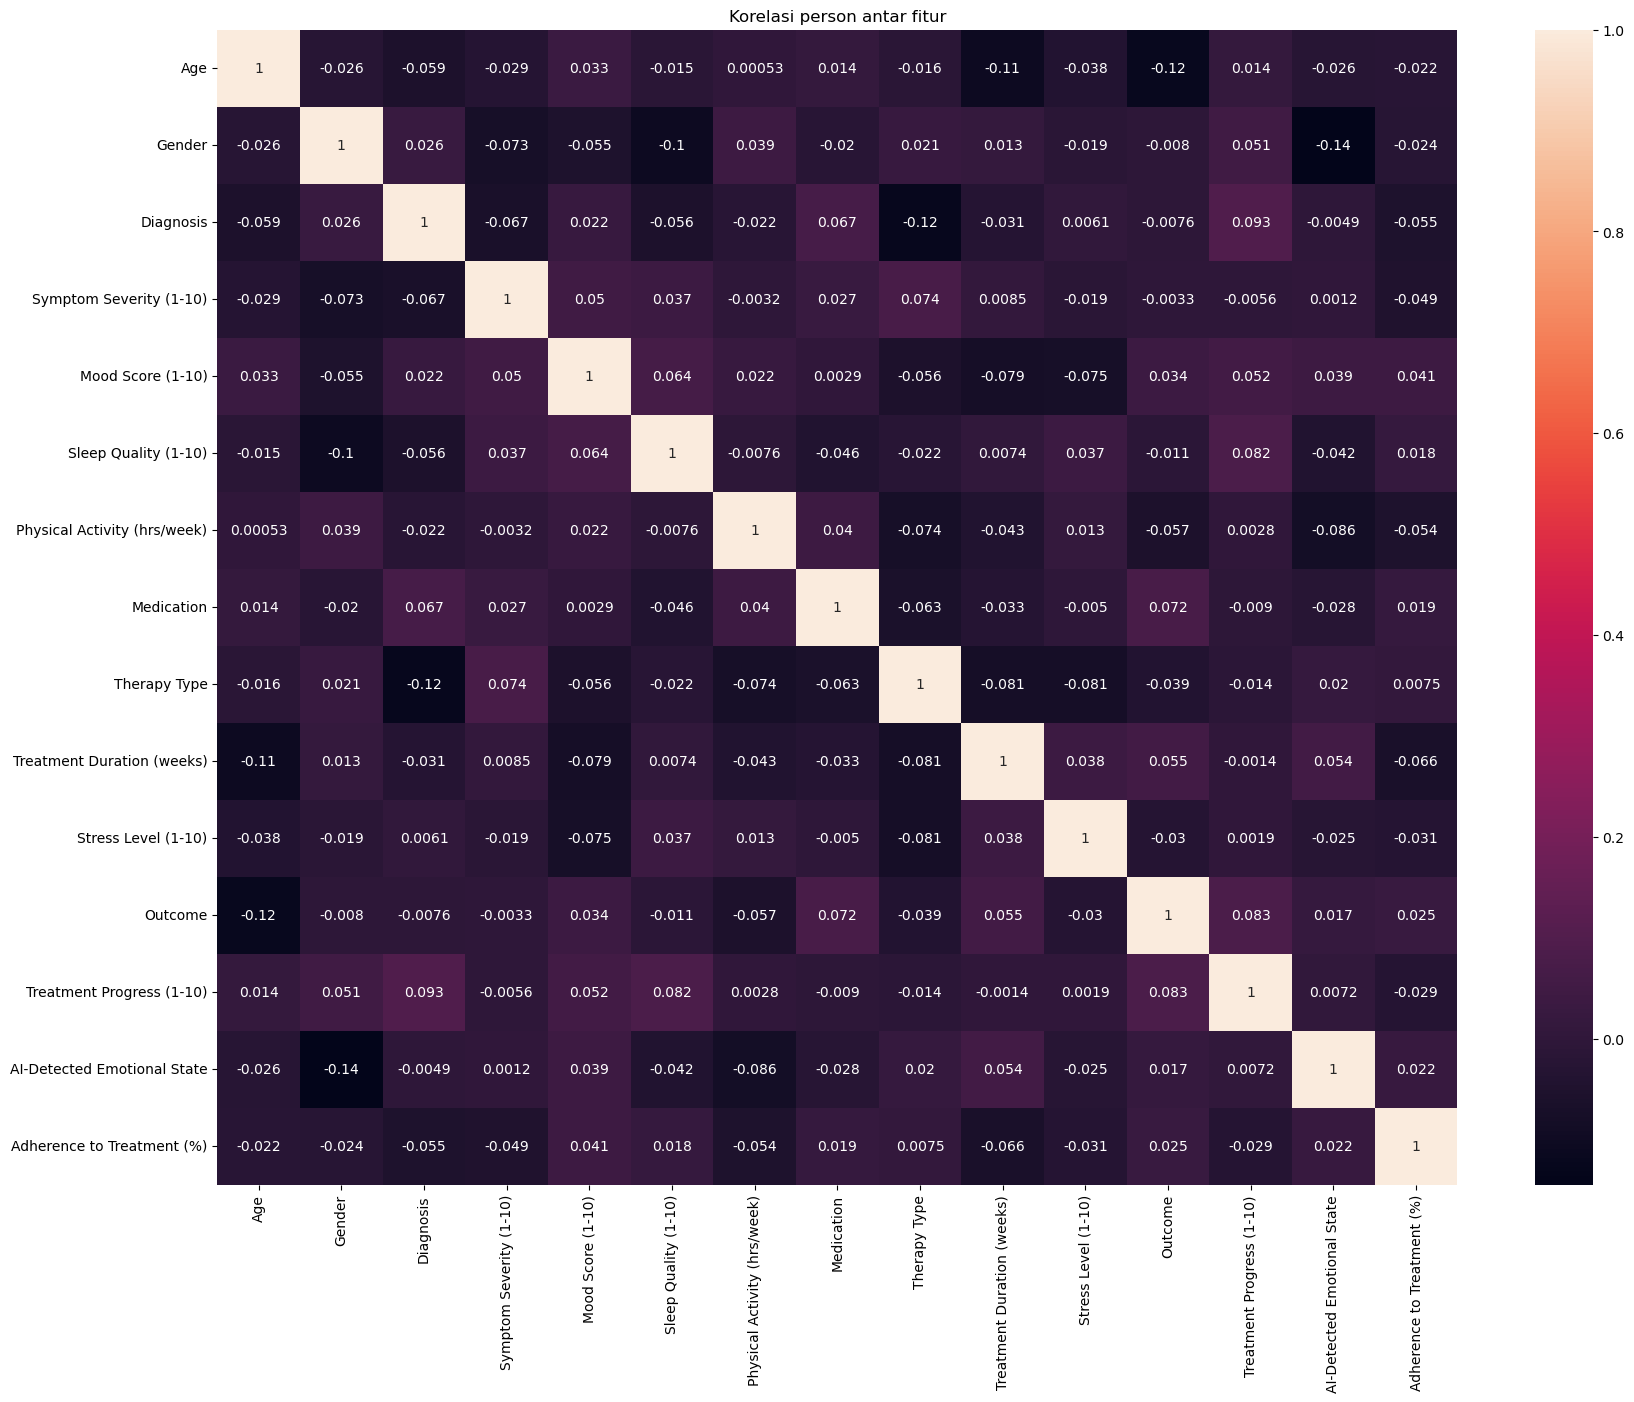

In [31]:
#korelasi pearson
plt.figure(figsize=(20,15))
sns.heatmap(df_baru2.corr(),annot=True,)
plt.title("Korelasi person antar fitur")
plt.show()

Pada correlation map di atas setelah dilakukan encoding, terdapat hasil korelasi yang bagus dan agak bagus.
1. Hasil korelasi yang memiliki korelasi positif adalah  **Symptom Saverity** memiliki hubungan positif antara **Theraphy Type**, **Mood Score**, **Medication** dan **Sleep Quality**.
2. Jurnal dari UAJY (https://ojs.uajy.ac.id/index.php/jbi/article/view/5568) menjelaskan bahwa dalam menangani kesehatan mental memerlukan **Diagnosis** untuk pencegahan.
3. Jurnal dari UNIKOM (https://ojs.unikom.ac.id/index.php/komputika/article/download/11793/4671) tingkat keparahan di pengaruhi oleh Faktor Demografis seperti **Umur (Age) dan Gender**

Jadi fitur yang akan digunakan adalah **Umur (Age), Gender, Mood Score, Sleep Quality, Diagnosis, Medication, Theraphy Type, Symptom Saverity**

In [33]:
df_baru21 = df_baru2.copy()
df_baru21 = df_baru2[["Age", "Gender", "Diagnosis", "Symptom Severity (1-10)", "Mood Score (1-10)", "Sleep Quality (1-10)", "Medication", "Therapy Type"]]

In [34]:
df_baru21

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Medication,Therapy Type
0,43,0,2,10,5,8,4,2
1,40,0,2,9,5,4,1,2
2,55,0,2,6,3,4,5,3
3,34,0,2,6,3,6,5,3
4,52,1,3,7,6,6,2,2
...,...,...,...,...,...,...,...,...
495,24,1,1,10,4,8,4,1
496,22,1,3,5,6,6,3,3
497,23,1,2,7,3,4,0,0
498,48,1,0,9,4,6,0,3


## Mengecek Outlier

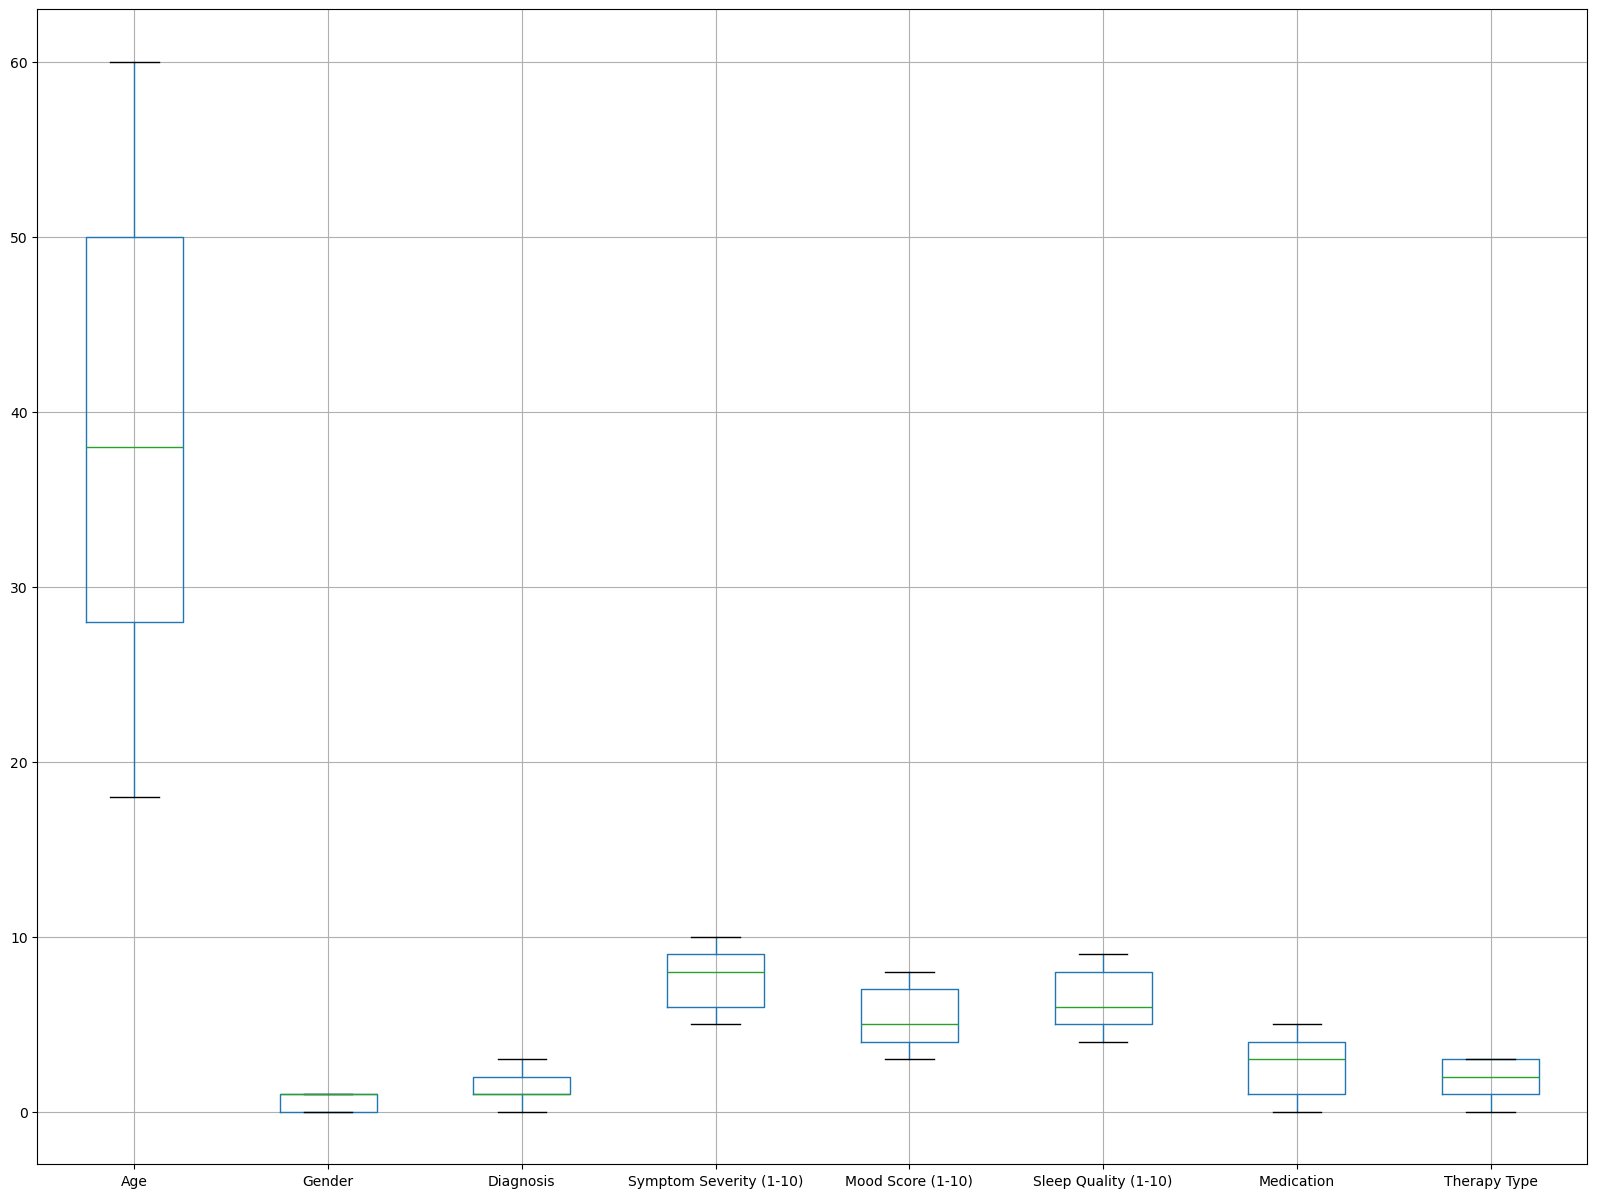

In [36]:
#membuat boxplot outlier
plt.figure(figsize=(20,15))

df_baru21.boxplot()

plt.show()


Data yang tersedia dari fitur yang dipilih bersih dari outlier. 

## Standarisasi 

In [39]:
#cara 1
from sklearn.preprocessing import StandardScaler

#pisahkan kolom
colom_pisah = ["Gender","Diagnosis","Medication","Symptom Severity (1-10)","Therapy Type"]

#kolom yang akan di standarisasi
standarisasi_kolom = [col for col in df_baru21.columns if col not in colom_pisah]

scaler = StandardScaler()

#standarisasi
df_baru21[standarisasi_kolom] = scaler.fit_transform(df_baru21[standarisasi_kolom])


In [40]:
df_baru21

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Medication,Therapy Type
0,0.337960,0,2,10,-0.282569,0.916893,4,2
1,0.101735,0,2,9,-0.282569,-1.483350,1,2
2,1.282864,0,2,6,-1.455055,-1.483350,5,3
3,-0.370717,0,2,6,-1.455055,-0.283229,5,3
4,1.046638,1,3,7,0.303674,-0.283229,2,2
...,...,...,...,...,...,...,...,...
495,-1.158136,1,1,10,-0.868812,0.916893,4,1
496,-1.315620,1,3,5,0.303674,-0.283229,3,3
497,-1.236878,1,2,7,-1.455055,-1.483350,0,0
498,0.731670,1,0,9,-0.868812,-0.283229,0,3


# Mengganti Nama Kolom

In [42]:
df_baru21 = df_baru21.rename(columns={'Symptom Severity (1-10)': 'SymptomSeverity(1-10)', 'Mood Score (1-10)': 'MoodScore(1-10)','Sleep Quality (1-10)': 'SleepQuality(1-10)', 'Therapy Type': 'TherapyType' })
df_baru21

,Age,Gender,Diagnosis,SymptomSeverity(1-10),MoodScore(1-10),SleepQuality(1-10),Medication,TherapyType
0,0.337960,0,2,10,-0.282569,0.916893,4,2
1,0.101735,0,2,9,-0.282569,-1.483350,1,2
2,1.282864,0,2,6,-1.455055,-1.483350,5,3
3,-0.370717,0,2,6,-1.455055,-0.283229,5,3
4,1.046638,1,3,7,0.303674,-0.283229,2,2
...,...,...,...,...,...,...,...,...
495,-1.158136,1,1,10,-0.868812,0.916893,4,1
496,-1.315620,1,3,5,0.303674,-0.283229,3,3
497,-1.236878,1,2,7,-1.455055,-1.483350,0,0
498,0.731670,1,0,9,-0.868812,-0.283229,0,3


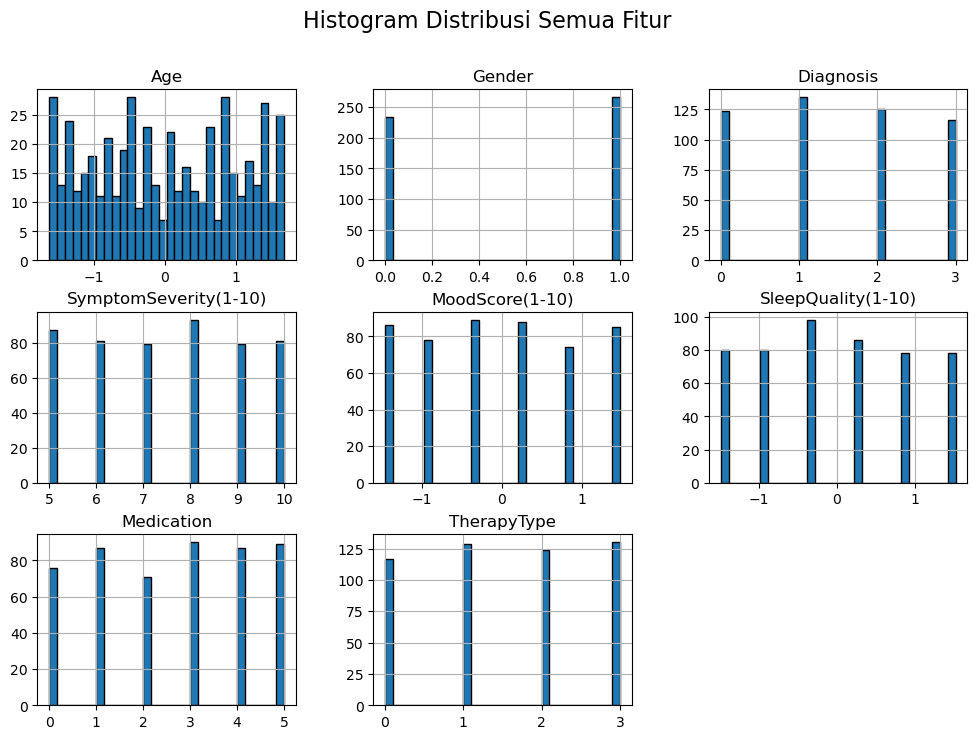

In [43]:
df_baru21.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram Distribusi Semua Fitur", fontsize=16)
plt.show()

**Kesimpulan** dari grafik **Histogram Distribusi Fitur** diatas adalah : 
1. Pada data set lebih banyak data laki-laki dari pada perempuan.
2. pada diagram diagnosis, diagnosis Generalized Anxiety merupadan diagnosis terbanyak yang dialami oleh pasien. Disusul oleh Bipolar Disorder dan Major Depresive Disorder yang jumlahnya hampir sama. 
3. Pada Medication, pengobatan Benzodiazepines merupakan pengobatan terbanyak yang dijalani oleh pasien. Dan selanjutnya jumlah terbnayak disusul dengan pengobatan  Antipsychotics yang memiliki juumlah yang tidak jauh berbeda dengan pengobatan SSRIS. 
4. Pada Therapy Type, terapi Mindfilness based theraphy merupakan terapi terbanyak yang dijalani ileh pasien. Lalu selanjutnya ada terapi Dialectical behavioral therapy sebagai terapi terbanyak kedua. 

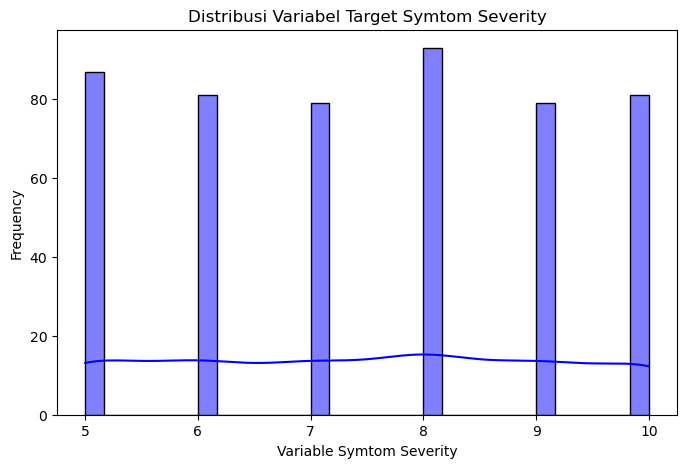

In [45]:
y = df_baru21["SymptomSeverity(1-10)"]
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='blue') 
plt.xlabel("Variable Symtom Severity")
plt.ylabel("Frequency")
plt.title("Distribusi Variabel Target Symtom Severity")
plt.show()

**Kesimpulan** dari grafik diatas bahwa variable 8 memiliki frequensi yang tertinggi, disusul dengan variable 5 dan 10 yang memiliki nilai imbang dengan variable 6. Dan dari grafik diatas juga dapat dilihat bahwa distribusi antar variable masih dalam tahap yang normal, tidak ada perbedaan yang mencolok didalamnya. 

# Melatih Model

In [48]:
#membagi ke x dan y
x = df_baru21[["Age", "Gender", "Diagnosis", "Medication", "MoodScore(1-10)", "SleepQuality(1-10)","TherapyType"]]
y = df_baru21["SymptomSeverity(1-10)"]

### 1. Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor 

In [51]:
#model
model_gbr = GradientBoostingRegressor(random_state=42)

#Bungkus dalam MultiOutputRegressor agar bisa menangani banyak target
#multi_output_gbr = MultiOutputRegressor(gbr)


In [52]:
ratio = [0.2,0.3,0.4]

In [53]:
for i in ratio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_gbr
    
    #melatih model
    #model.fit(x_train, y_train)

    model.fit(x_train, y_train)

    
    #menghitung sisi dari pelatihan
    y_pred_train =  model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test =  model.predict(x_test)

    print(f"R2_score pelatihan Gradient Boosting rasio {i} adalah : {r2_score(y_pred_train,y_train)}")
    print(f"R2_score pengujian Gradient Boosting rasio {i} adalah : {r2_score(y_pred_test,y_test)}")

R2_score pelatihan Gradient Boosting rasio 0.2 adalah : -2.1673807853331555
R2_score pengujian Gradient Boosting rasio 0.2 adalah : -4.142141645775369
R2_score pelatihan Gradient Boosting rasio 0.3 adalah : -1.5892412032891734
R2_score pengujian Gradient Boosting rasio 0.3 adalah : -3.9732793446192733
R2_score pelatihan Gradient Boosting rasio 0.4 adalah : -0.8797154741376132
R2_score pengujian Gradient Boosting rasio 0.4 adalah : -4.649428486927626


# 2. Xgboost

In [55]:
import xgboost as xgb
from xgboost import XGBRegressor
#from sklearn.multioutput import MultiOutputRegressor

In [56]:
#model
model_xgb = xgb.XGBRegressor (n_estimators=100, learning_rate=0.1)

In [57]:
for i in ratio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_xgb
    
    #melatih model
    #model.fit(x_train, y_train)

    model.fit(x_train, y_train)

    
    #menghitung sisi dari pelatihan
    y_pred_train =  model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test =  model.predict(x_test)

    print(f"R2_score pelatihan Xgboost rasio {i} adalah : {r2_score(y_pred_train,y_train)}")
    #print(f"R2_score pengujian Xgboost rasio {i} adalah : {r2_score(y_pred_test,y_test)}")

R2_score pelatihan Xgboost rasio 0.2 adalah : 0.9428463578224182
R2_score pelatihan Xgboost rasio 0.3 adalah : 0.9663928747177124
R2_score pelatihan Xgboost rasio 0.4 adalah : 0.9848456382751465


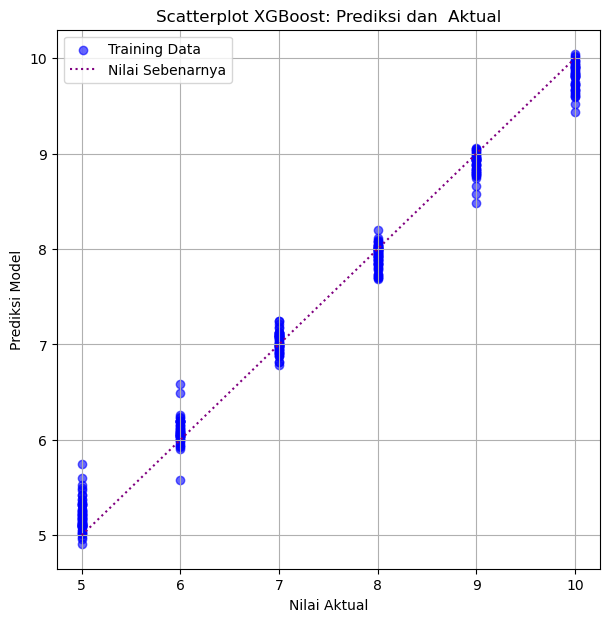

In [58]:
plt.figure(figsize=(7, 7))
plt.scatter(y_train, y_pred_train, color="blue", label="Training Data", alpha=0.6)
x_vals = np.linspace(min(y_train), max(y_train), 100)
plt.plot(x_vals, x_vals, linestyle="dotted", color="purple", label="Nilai Sebenarnya")

plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi Model")
plt.title("Scatterplot XGBoost: Prediksi dan  Aktual")
plt.legend()
plt.grid(True)
plt.show()

**Kesimpulan** dari bagan diatas adalah, meskipun tidak terletak secara akurat namun titik tetap berada sangat dekat dengan garis, menunjukkan bahwa model XGBoost mampu memprediksi dengan baik pada data training. Dimana artinya Model algoritma XGBoost memiliki performa yang cukup baik pada data training, dengan prediksi yang hampir sesuai dengan nilai aktual.

<Figure size 800x500 with 0 Axes>

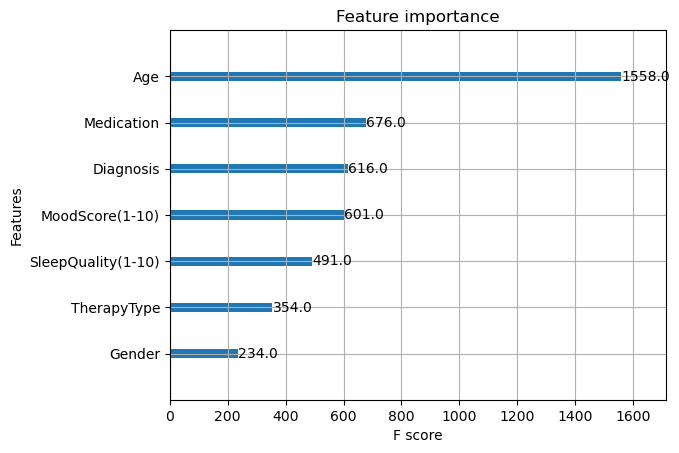

In [60]:
# Plot feature importance
from xgboost import plot_importance
plt.figure(figsize=(8, 5))
plot_importance(model_xgb)
plt.show()

**Kesimpulan** diatas bahwa 3 feature yang paling memberikan pengaruh kepada perhitungan algoritma Xgboost adalah  **Umur (age), Medication, dan diagnosis.** Medication dan diganosis meberikan pengaruh secara langsung terhadap proses penyembuhan pasien.

# 3. Random Forest 

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [64]:
#model
model_rfc = RandomForestRegressor(n_estimators=100, random_state=42)

In [65]:
for i in ratio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_rfc
    
    #melatih model
    #model.fit(x_train, y_train)

    model.fit(x_train, y_train)

    
    #menghitung sisi dari pelatihan
    y_pred_train =  model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test =  model.predict(x_test)

    print(f"R2_score pelatihan Random Forest rasio {i} adalah : {r2_score(y_pred_train,y_train)}")
    print(f"R2_score pengujian Random Forest rasio {i} adalah : {r2_score(y_pred_test,y_test)}")

R2_score pelatihan Random Forest rasio 0.2 adalah : 0.6259129853046703
R2_score pengujian Random Forest rasio 0.2 adalah : -9.054013456891436
R2_score pelatihan Random Forest rasio 0.3 adalah : 0.6115380672214676
R2_score pengujian Random Forest rasio 0.3 adalah : -11.311887441474065
R2_score pelatihan Random Forest rasio 0.4 adalah : 0.6098003883794201
R2_score pengujian Random Forest rasio 0.4 adalah : -10.999792553368772


# Simpan Model 

In [67]:
import joblib

joblib.dump(model_xgb, "model_mentalhealth_xgb.joblib")

['model_mentalhealth_xgb.joblib']

In [68]:
import pickle
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

print("Model berhasil disimpan di model_xgb.pkl!")

Model berhasil disimpan di model_xgb.pkl!


In [69]:
muat_model = joblib.load("model_mentalhealth_xgb.joblib")

In [70]:
df_baru["Therapy Type"].value_counts()

Therapy Type
3    130
1    129
2    124
0    117
Name: count, dtype: int64

In [71]:
df["Therapy Type"].value_counts()

Therapy Type
Mindfulness-Based Therapy         130
Dialectical Behavioral Therapy    129
Interpersonal Therapy             124
Cognitive Behavioral Therapy      117
Name: count, dtype: int64

In [72]:
def predict_symptom_severity(model):
    print("=== Silahkan Masukkan Data Individu ===")
    Gender = int(input("Jenis Kelamin (1: Male, 0: Female): "))
    Age = int(input("Masukkan Usia: "))
    Diagnosis = int(input("Jenis Diagnosa (0: Bipolar Disorder, 1 Generalized Anxiety, 2: Major Depresive Disorder, 3: Panic Disorder)"))
    Medication = int(input("Masukkan Jenis Pengobatan (0 : Antidepressants, 1 : Antipsychotics, 2 : Anxiolytics, 3 : Benzodiazepines, 4 : Mood Stabilizers, 5 : SSRIs) "))
    MoodScore = int(input("Berapa Rate mood anda saat ini ?: "))
    SleepQuality = int(input("Berapa Rate Kualitas Tidur Anda ?: "))
    TherapyType = int(input("Jenis Terapi apa yang ada jalani ? (0: Cognitive Behavioral Therapy, 1: Dialectical Behavioral Therapy, 2: Interpersonal Therapy, 3: Mindfulness-Based Therapy)"))
    data_baru = np.array([Gender,
                          Age, 
                          Diagnosis, 
                          Medication, 
                          MoodScore,
                          SleepQuality, 
                         TherapyType, 
                          ])

    data_baru = data_baru.reshape(1, -1)
    prediksi = model.predict(data_baru)
    print("\nHasil Prediksi:")
    print(f"Kategori Keparahan Gejala: {prediksi[0]}") 

In [73]:
predict_symptom_severity(model_xgb)

=== Silahkan Masukkan Data Individu ===


Jenis Kelamin (1: Male, 0: Female):  1
Masukkan Usia:  1
Jenis Diagnosa (0: Bipolar Disorder, 1 Generalized Anxiety, 2: Major Depresive Disorder, 3: Panic Disorder) 1
Masukkan Jenis Pengobatan (0 : Antidepressants, 1 : Antipsychotics, 2 : Anxiolytics, 3 : Benzodiazepines, 4 : Mood Stabilizers, 5 : SSRIs)  1
Berapa Rate mood anda saat ini ?:  1
Berapa Rate Kualitas Tidur Anda ?:  1
Jenis Terapi apa yang ada jalani ? (0: Cognitive Behavioral Therapy, 1: Dialectical Behavioral Therapy, 2: Interpersonal Therapy, 3: Mindfulness-Based Therapy) 1



Hasil Prediksi:
Kategori Keparahan Gejala: 8.63791561126709


# Kesimpulan

Dari projek yang telah dibuat dapat disimpulkan bahwa : Data yang digunakan berisi 500 baris 17 kolom, setelah melakukan data loading dan dilanjutkan dengan explorasi data dan pelatihan machine leraning. 

Dari 17 kolom yang ada, **Symptom Severity merupakan target yang ingin diprediksi dengan memprediksi tingkat keparahan suatu gejala yang dialami oleh seseorang dan dalam data seat yang digunakan kali ini adalah gejala mental.** 

Variabel yng dipilih untuk digunakan sebagai feature dalam pembuatan model adalah
Gender, Age, Diagnosis, Medication, MoodScore, SleepQuality, TherapyType. 

Dalam pengembangan model dicoba dengan tiga algoritma klasifikasi yaitu Gradient Boosting, Xgboost, dan Random forest. Dari semua algoritma yang telah dicoba tidak semua memberikan hasil yang baik. Dari percobaan Xgboos memberikan akurasi terbaik pada rasio 0.4 dengan akurasi pelatihan 98%. Sedangkan algoritma gradient bossting memberikan akurasi terbaik pada rasio 0.4 dengan akurasi pelatihan - 0.87, yang artinya darai ini untuk memprediksi Symtom Severity tidak cocok menggunakan algoritma Gradient boosting. Selanjutnya algoritma random forest memberikan performa terbaik pada rasio 0.2 dengan nilai akurasi pelatihan 62%. 

Serta terdapat 3 feature yang paling memberikan pengaruh kepada perhitungan algoritma Xgboost adalah  **Umur (age), Medication, dan diagnosis.**